In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft
from scipy.signal import lfilter

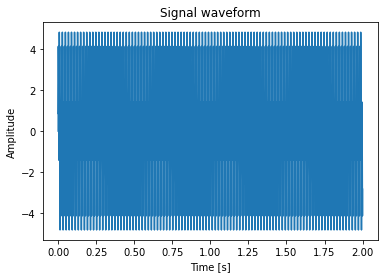

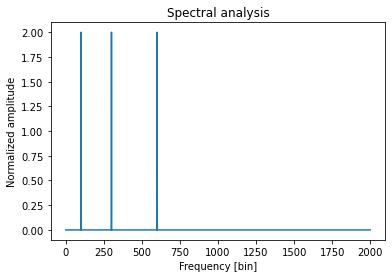

In [92]:
Fs = 2000 # sampling frequency [Hz]
f1 = 50 # signal 1 frequency [Hz]
f2 = 150 # signal 2 frequency [Hz]
f3 = 300 # signal 3 frequency [Hz]
t_max = 2 # measurement time [s]
A = 2 # amplitude [m/s]


k = 1/Fs
t = np.arange(0, t_max, k)
omega1 = 2*np.pi*f1
omega2 = 2*np.pi*f2
omega3 = 2*np.pi*f3

x = A*np.sin(omega1*t) + A*np.sin(omega2*t) + A*np.sin(omega3*t)

plt.plot(t, x)
plt.title('Signal waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

n = len(x)
y = abs(fft(x))/(n/2)
y = y[0:int(n/2)]

plt.plot(y)
plt.title('Spectral analysis')
plt.xlabel('Frequency [bin]')
plt.ylabel('Normalized amplitude')
plt.show()

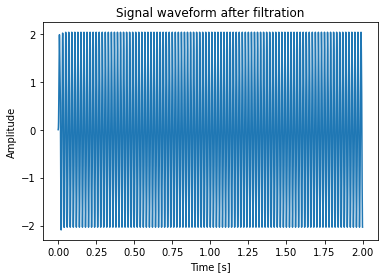

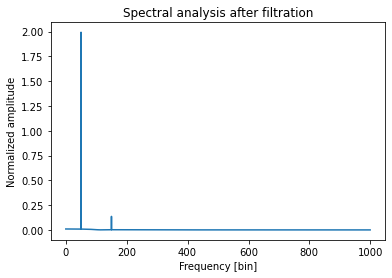

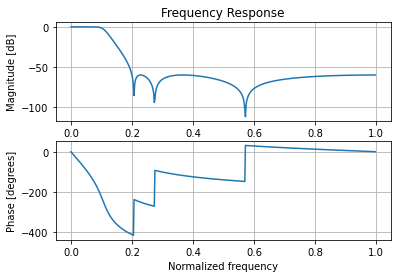

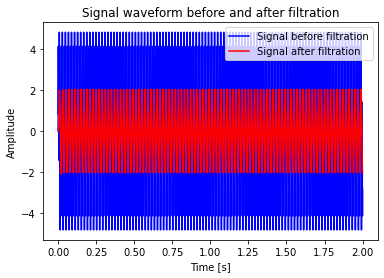

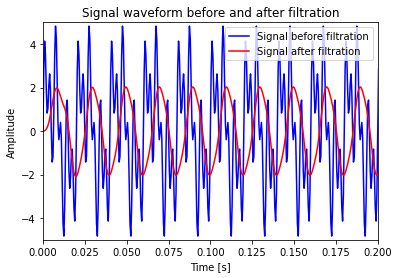

In [93]:
N = 6 # filter row
R = 60 # rejection in the blocking band [dB]
fod = 200 # cut-off frequency [Hz]
Wst = fod/(Fs/2) # normalized cut-off frequency


B, A = signal.cheby2(N, R, Wst, 'lowpass')
xd = lfilter(B, A, x)

plt.plot(t, xd)
plt.title('Signal waveform after filtration')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

y2 = abs(fft(xd))/(n/2)
y2 = y2[0:int(n/2)]
fz2 = Fs*np.arange(0, (n/2))/n

plt.plot(fz2, y2)
plt.title('Spectral analysis after filtration')
plt.xlabel('Frequency [bin]')
plt.ylabel('Normalized amplitude')
plt.show()

w, h = signal.freqz(B, A)
mag = 20*np.log10(abs(h))
phase = np.unwrap(np.arctan2(np.imag(h), np.real(h)))*(180/np.pi)
freq = w/np.pi

plt.subplot(2, 1, 1)
plt.plot(freq, mag)
plt.title('Frequency Response')
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freq, phase)
plt.xlabel('Normalized frequency')
plt.ylabel('Phase [degrees]')
plt.grid(True)
plt.show()

plt.plot(t, x, 'b', label = 'Signal before filtration')
plt.plot(t, xd, 'r', label = 'Signal after filtration')
plt.title('Signal waveform before and after filtration')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(t, x, 'b', label = 'Signal before filtration')
plt.plot(t, xd, 'r', label = 'Signal after filtration')
plt.title('Signal waveform before and after filtration')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.2)
plt.ylim(-5, 5)
plt.legend()
plt.show()